## Importing Libraries

In [143]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style = "darkgrid" , font_scale = 1.5)
pd.set_option("display.max.rows", None)
pd.set_option("display.max.columns", None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier , StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV 
from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score , confusion_matrix 
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler 

from imblearn.over_sampling import SMOTE

## Loading Datasets

In [145]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [146]:
train_df.shape

(8693, 14)

In [147]:
test_df.shape

(4277, 13)

In [148]:
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [149]:
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [150]:
train_df.duplicated().sum()

0

In [151]:
test_df.duplicated().sum()

0

In [152]:
print("Train Data Types :\n",train_df.dtypes)

Train Data Types :
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [153]:
print("Test Data Types : \n",test_df.dtypes)

Test Data Types : 
 PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [154]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns = {0:"Numbers of Missing Values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum())/len(train_df),2)
df1

Numbers of Missing Values  % of Missing Values
HomePlanet                          201                 2.31
CryoSleep                           217                 2.50
Cabin                               199                 2.29
Destination                         182                 2.09
Age                                 179                 2.06
VIP                                 203                 2.34
RoomService                         181                 2.08
FoodCourt                           183                 2.11
ShoppingMall                        208                 2.39
Spa                                 183                 2.11
VRDeck                              188                 2.16
Name                                200                 2.30

In [155]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns = {0:"Numbers of Missing Values"})
df2["% of Missing Values"] = round(100*test_df.isnull().sum()/len(test_df),2)
df2

Numbers of Missing Values  % of Missing Values
HomePlanet                           87                 2.03
CryoSleep                            93                 2.17
Cabin                               100                 2.34
Destination                          92                 2.15
Age                                  91                 2.13
VIP                                  93                 2.17
RoomService                          82                 1.92
FoodCourt                           106                 2.48
ShoppingMall                         98                 2.29
Spa                                 101                 2.36
VRDeck                               80                 1.87
Name                                 94                 2.20

In [156]:
train_df.select_dtypes(include = "object").nunique()


PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [157]:
test_df.select_dtypes(include = "object").nunique()

PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64

## EDA

In [159]:
train_df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

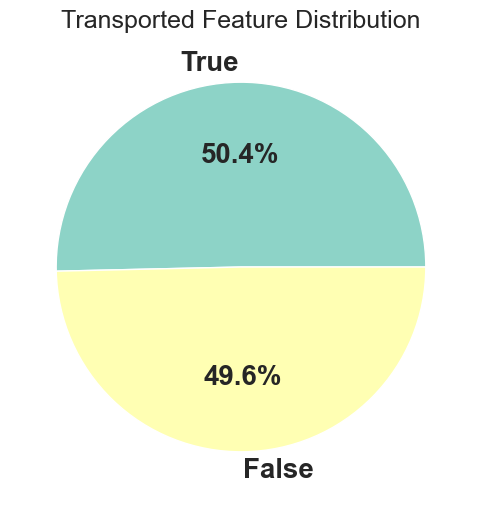

In [160]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels = train_df["Transported"].value_counts().keys(),autopct="%1.1f%%",
       textprops = {"fontsize":20 , "fontweight" : "black"} , colors = sns.color_palette("Set3"))
plt.title("Transported Feature Distribution")
plt.show()

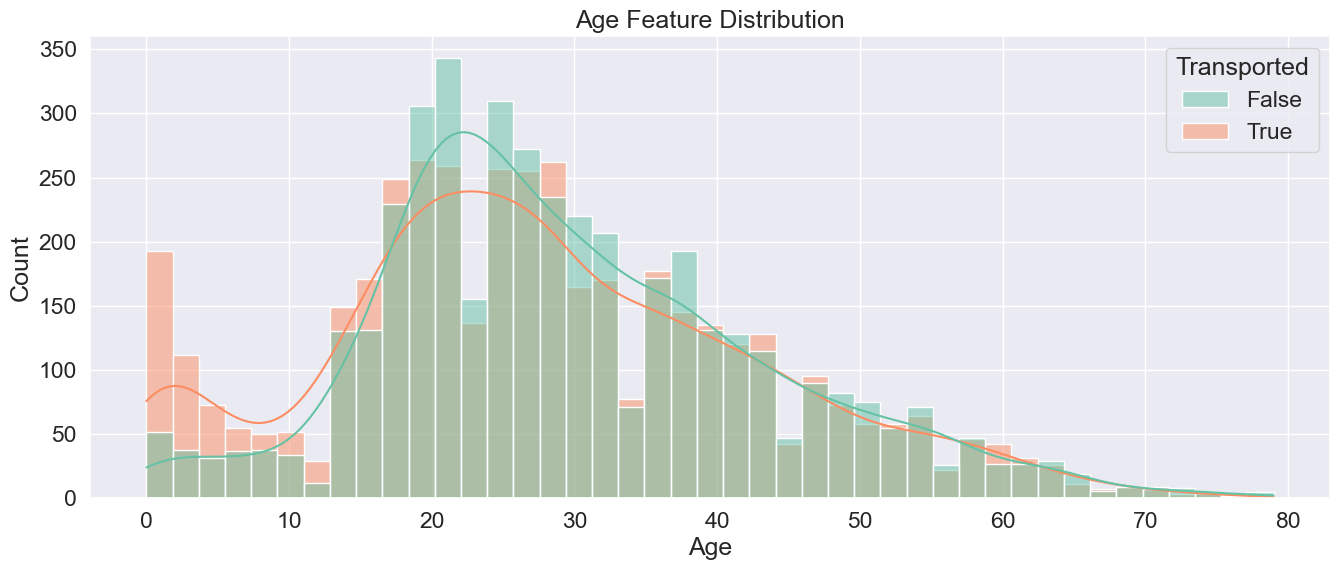

In [161]:
plt.figure(figsize = (16,6))
sns.histplot(x = train_df["Age"],hue = "Transported" , data = train_df , kde = True , palette = "Set2")
plt.title("Age Feature Distribution")
plt.show()

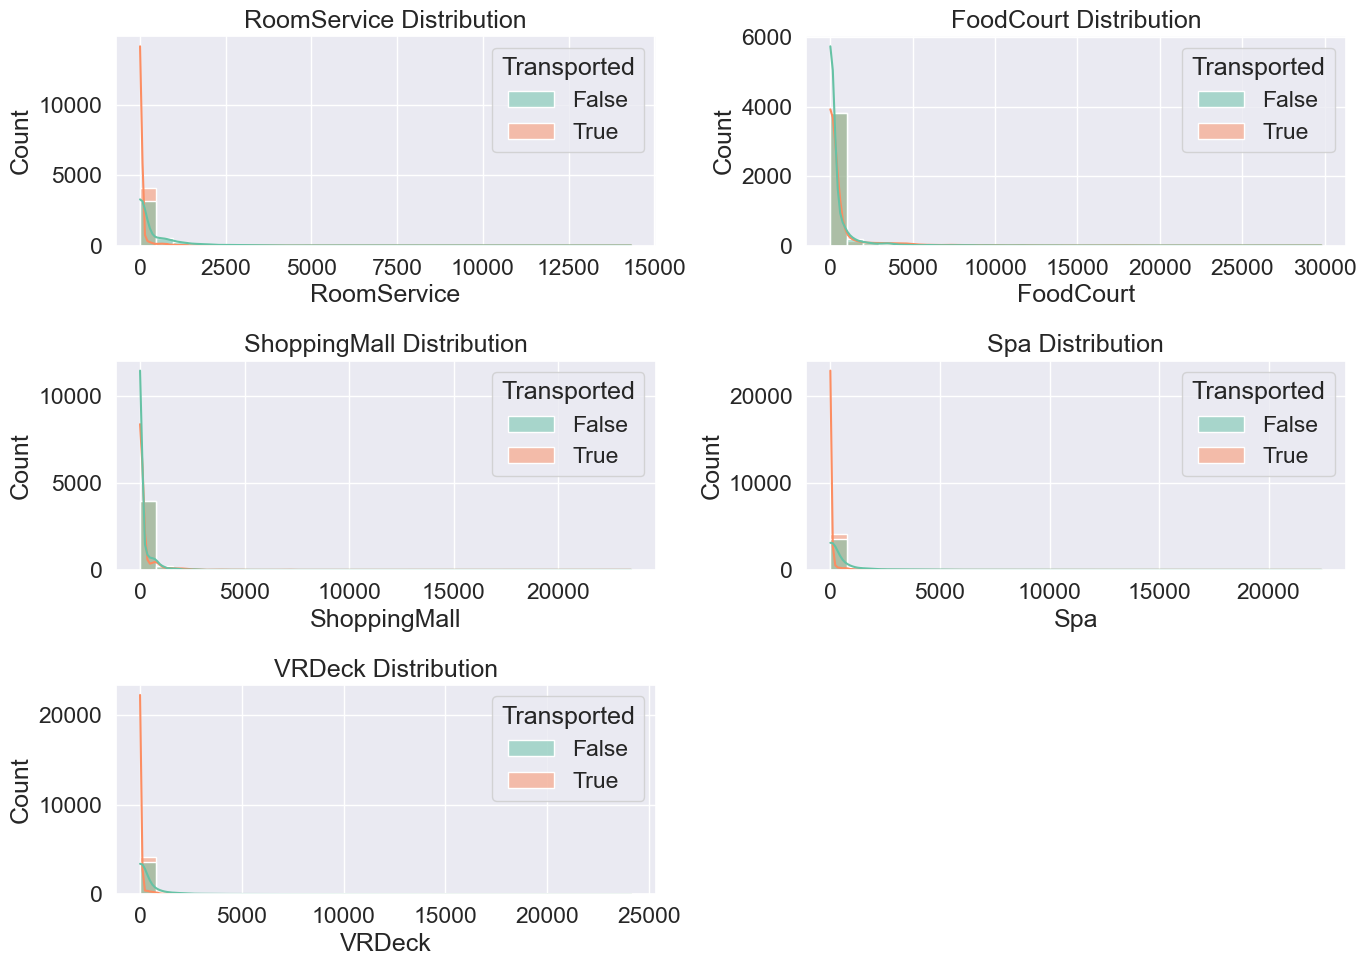

In [162]:
exp_cols = ["RoomService" , "FoodCourt" , "ShoppingMall" , "Spa" , "VRDeck"]

plt.figure(figsize = (14,10))
for idx , column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x = column , hue = "Transported" , data = train_df , bins = 30 , kde = True , palette = "Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

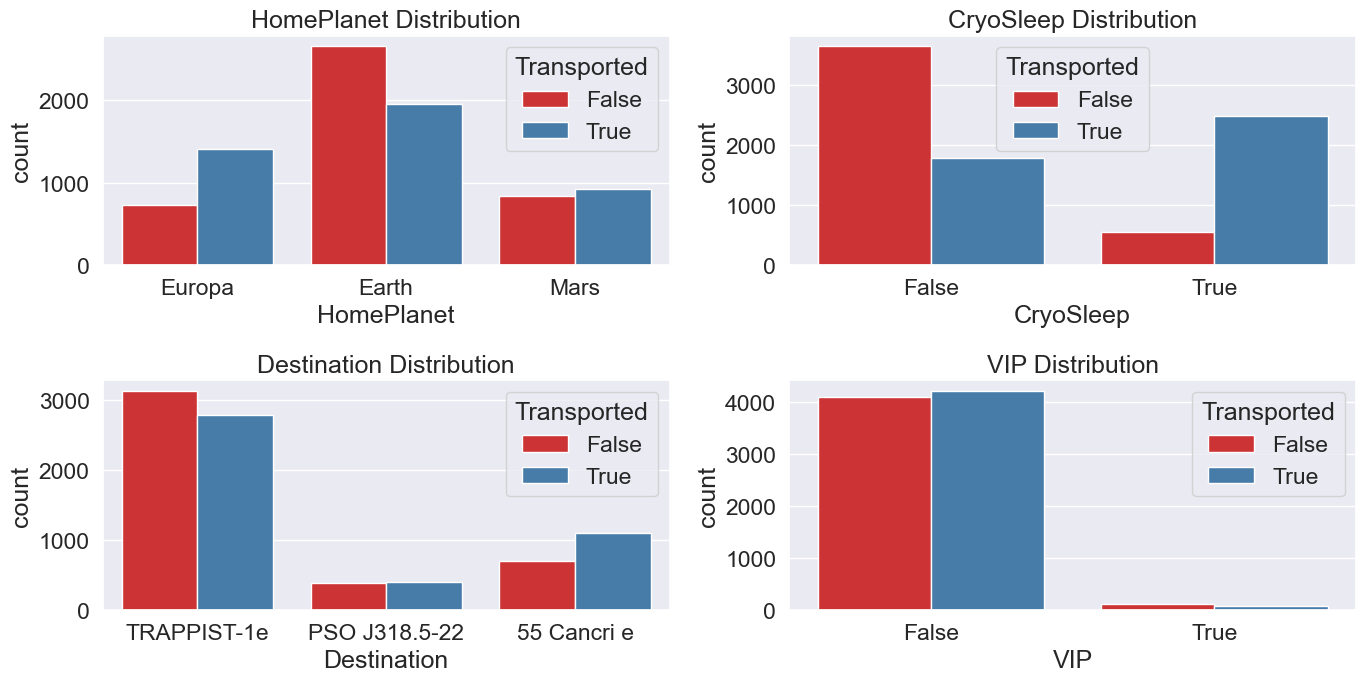

In [163]:
exp_cols = ["HomePlanet" , "CryoSleep" , "Destination" , "VIP"]

plt.figure(figsize = (14,10))
for idx , column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.countplot(x = column , hue = "Transported" , data = train_df , palette = "Set1")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

## Feature Engineering  

### Spliting of Passenger ID 


In [166]:
train_df["PassengerId"].head().to_frame()

PassengerId
0     0001_01
1     0002_01
2     0003_01
3     0003_02
4     0004_01

In [167]:
def passengerid_new_features(df):

    df["Group"] = df["PassengerId"].apply(lambda x : x.split("_")[0])
    df["Member"] = df["PassengerId"].apply(lambda x : x.split("_")[1])

    x = df.groupby("Group")["Member"].count().sort_values()

    y = set(x[x>1].index)

    df["Travelling_Solo"] = df["Group"].apply(lambda x : x not in y)

    df["Group_Size"] = 0

    for i in x.items():
        df.loc[df["Group"] == i[0] , "Group_Size"] = i[1]

In [168]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [169]:
train_df.drop(columns = ["Group","Member"] , inplace = True)
test_df.drop(columns = ["Group" , "Member"] , inplace = True)

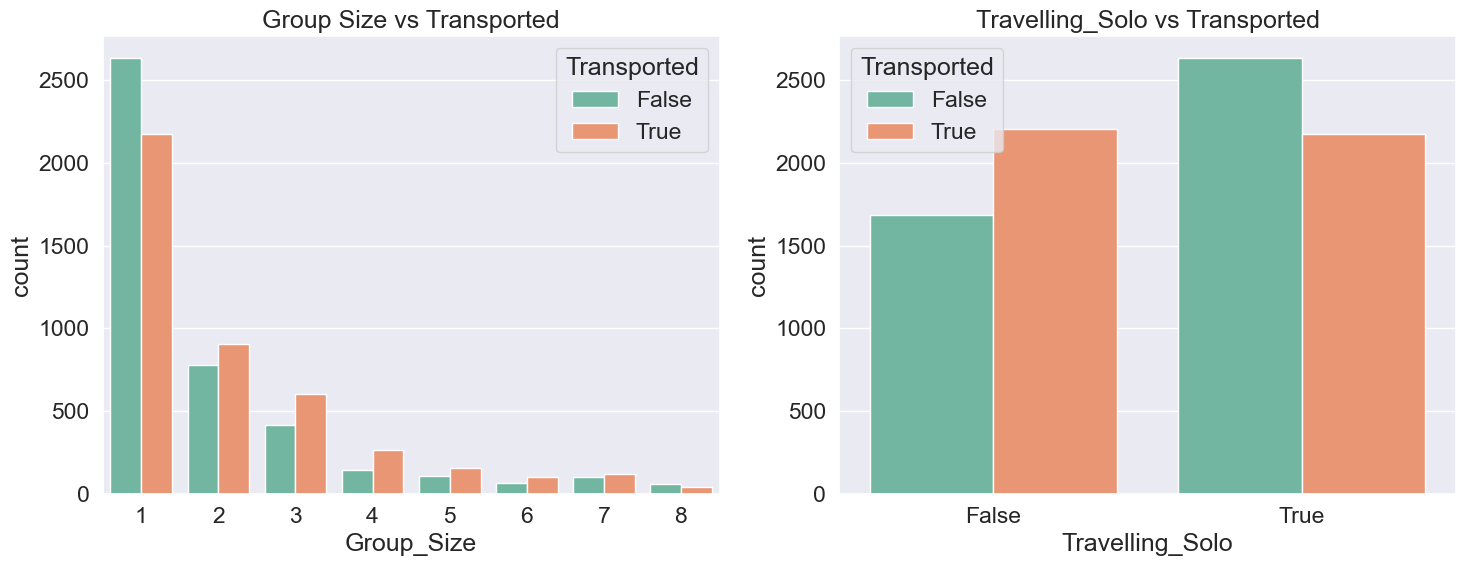

In [170]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x = "Group_Size" , hue = "Transported" , data = train_df , palette = "Set2")
plt.title("Group Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x = "Travelling_Solo" , hue = "Transported" , data = train_df , palette = "Set2")
plt.title("Travelling_Solo vs Transported")
plt.tight_layout()
plt.show()

### Spliting of Cabin feature

In [172]:
def new_cabin_feature(df):
    df["Cabin"].fillna("nothing/nothing/nothing",inplace = True)

    df["Cabin_Deck"] = df["Cabin"].apply(lambda x : x.split("/")[0])
    df["Cabin_Number"] = df["Cabin"].apply(lambda x : x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x : x.split("/")[2])

    cols = ["Cabin_Deck" , "Cabin_Number" , "Cabin_Side"]
    df[cols] = df[cols].replace("nothing" , np.nan)

    df["Cabin_Number"] = pd.to_numeric(df["Cabin_Number"], errors="coerce")

    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace = True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0] , inplace = True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace = True)

In [173]:
new_cabin_feature(train_df)
new_cabin_feature(test_df)

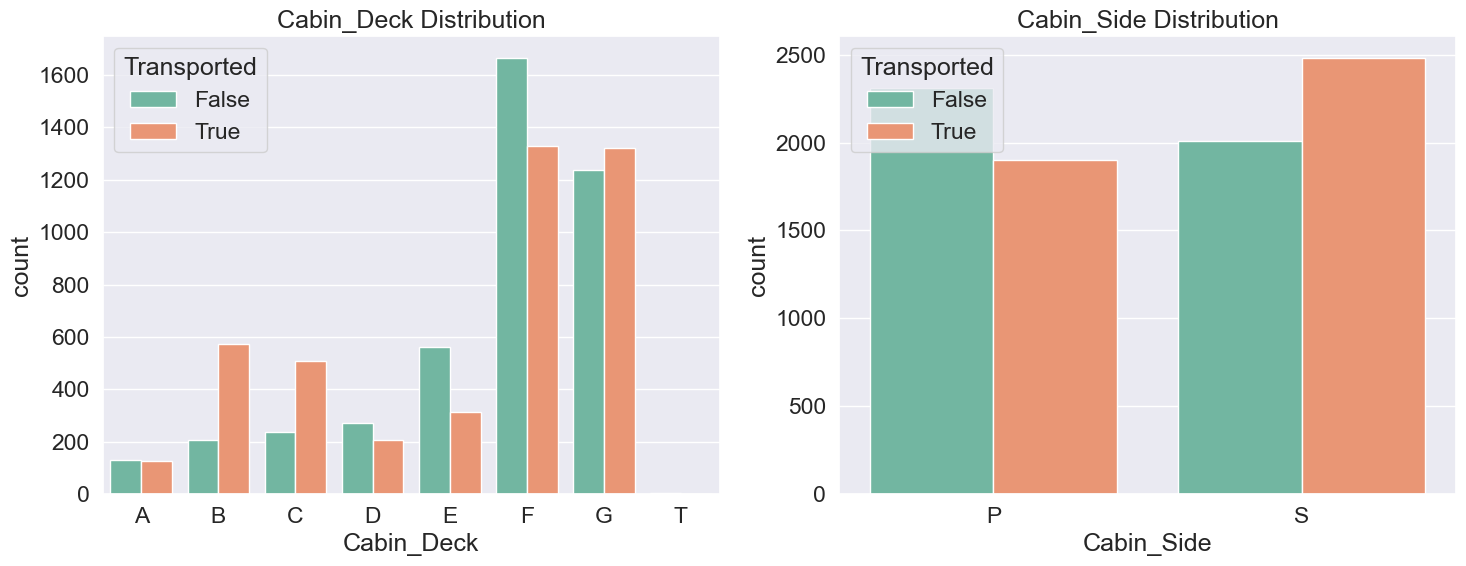

In [174]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x = "Cabin_Deck" , hue = "Transported" , data = train_df , palette = "Set2" , order = ["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x = "Cabin_Side" , hue = "Transported" , data = train_df , palette = "Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()


In [175]:
train_df["Cabin_Number"] = train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"] = test_df["Cabin_Number"].astype(int)

In [176]:
print("The Values of Cabin Number")
print("Total Unique Numbers : " ,train_df["Cabin_Number"].nunique())
print("The Mean : " , train_df["Cabin_Number"].mean())
print("The Median : " , train_df["Cabin_Number"].median())
print("The Minimum Value : " , train_df["Cabin_Number"].min())
print("The Maximum Value : " , train_df["Cabin_Number"].max())

The Values of Cabin Number
Total Unique Numbers :  1817
The Mean :  596.3989416772115
The Median :  427.0
The Minimum Value :  0
The Maximum Value :  1894


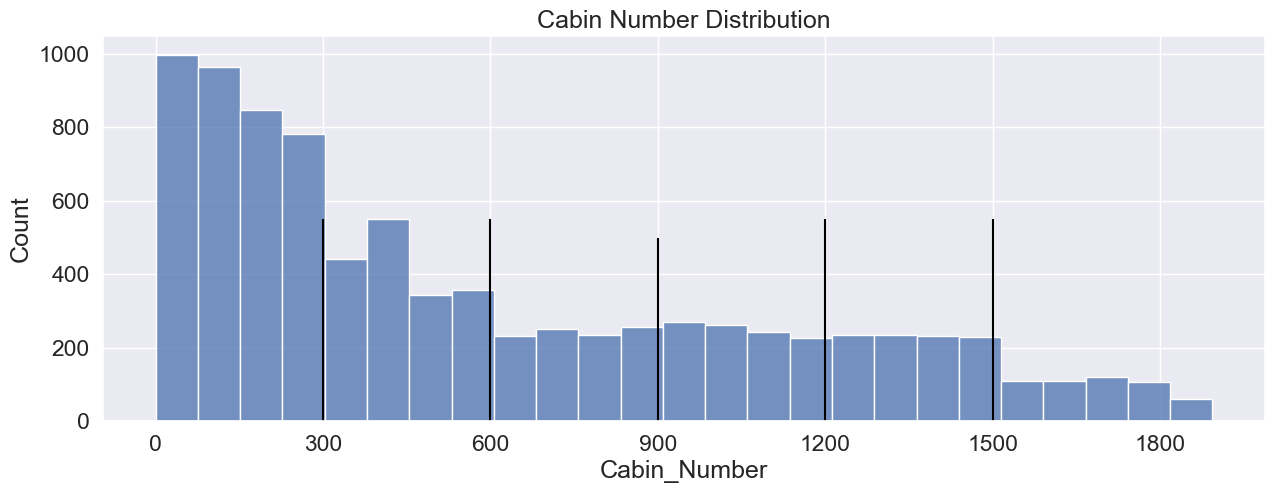

In [177]:
plt.figure(figsize = (15,5))
sns.histplot(x = "Cabin_Number" , data = train_df , palette = "Set2")
plt.title("Cabin Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0, ymax = 550 , color = "black")
plt.vlines(600,ymin = 0 , ymax = 550 , color = "black")
plt.vlines(900 , ymin = 0 , ymax = 500 , color = "black")
plt.vlines(1200,ymin = 0 , ymax = 550 , color = "black")
plt.vlines(1500,ymin = 0 , ymax = 550 , color = "black")
plt.show()

In [178]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [179]:
cabin_regions(train_df)
cabin_regions(test_df)

In [180]:
train_df.drop(columns = ["Cabin_Number"] , inplace = True)
test_df.drop(columns = ["Cabin_Number"] , inplace = True)

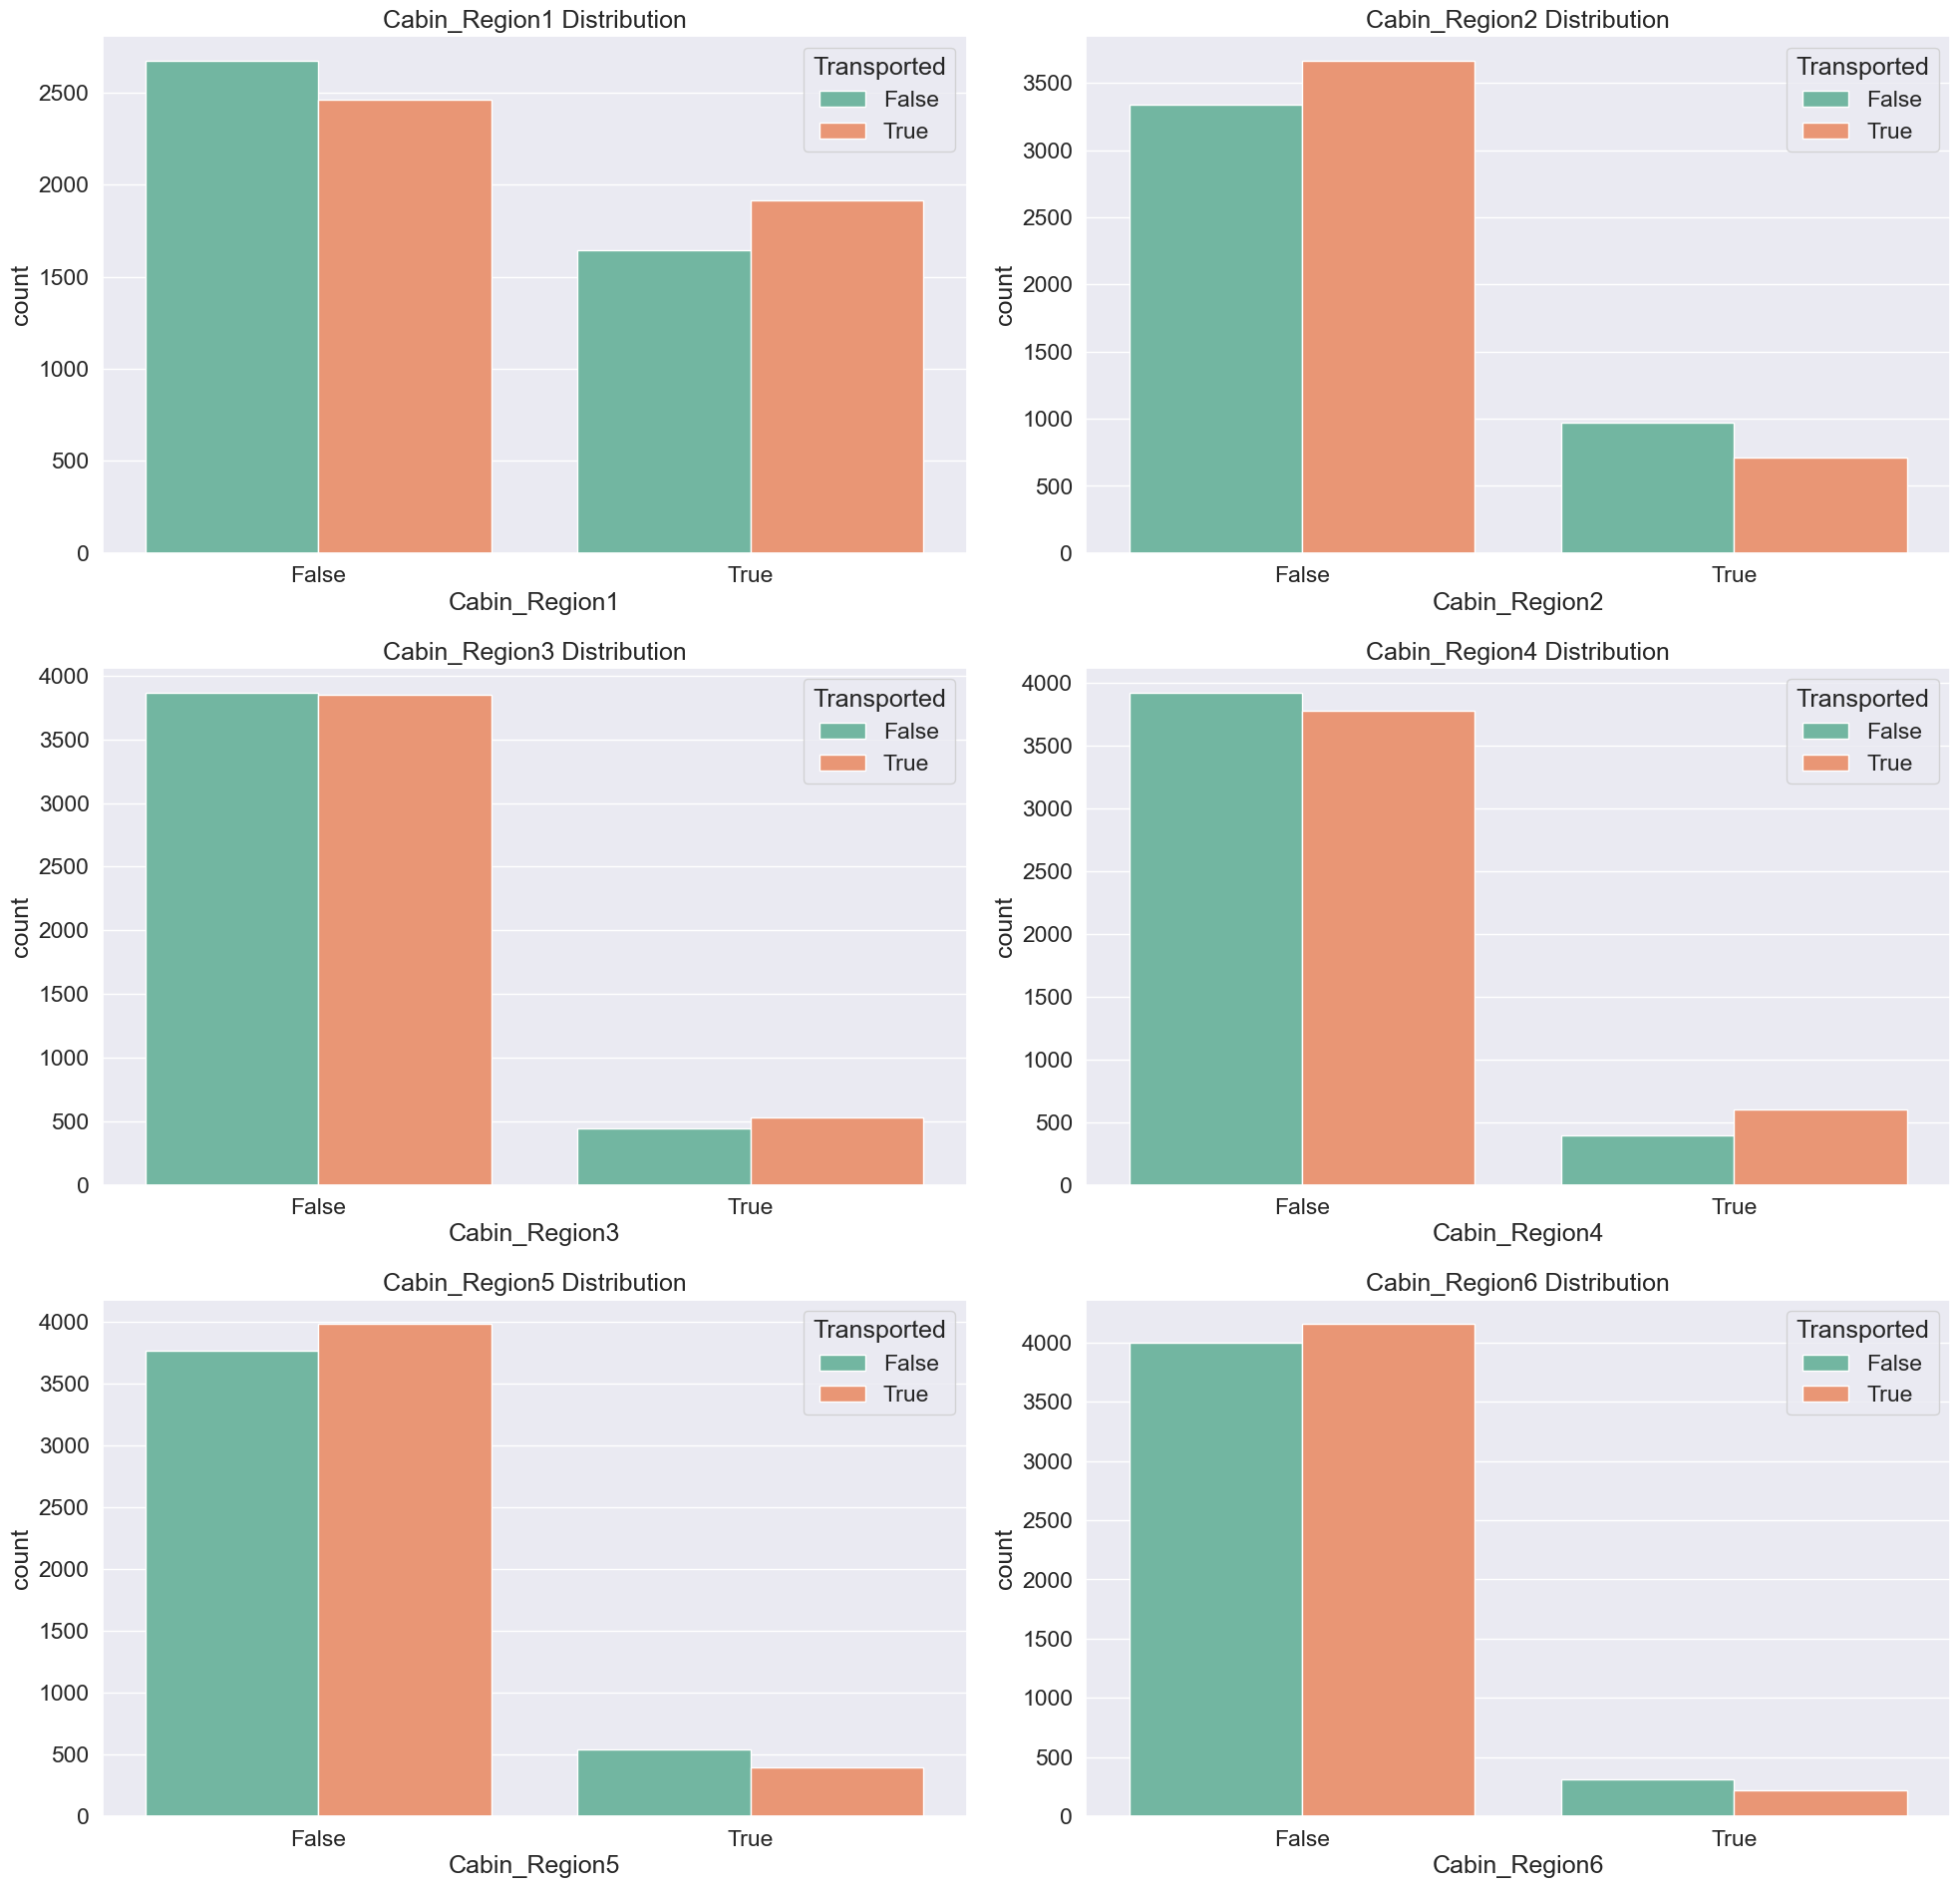

In [181]:
cols = ["Cabin_Region1" , "Cabin_Region2" , "Cabin_Region3" , "Cabin_Region4" , "Cabin_Region5" , "Cabin_Region6"]

plt.figure(figsize = (20,25))

for idx , value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x = value , hue = "Transported" , data = train_df , palette = "Set2")
    plt.title(f"{value} Distribution")

plt.tight_layout()
plt.show()

### Binning of Age Group 

In [183]:
train_df["Age"].head().to_frame()

Age
0  39.0
1  24.0
2  58.0
3  33.0
4  16.0

In [184]:
def age_group(df):
    age_group = []
    for i in df["Age"]:
        if i <= 12:
            age_group.append("Age_0-12")
        elif ( i > 12 and i <= 25):
            age_group.append("Age_13-25")
        elif(i > 25 and i <= 32):
            age_group.append("Age_26-32")
        elif(i > 32 and i <= 50):
            age_group.append("Age_33-50")
        elif(i>50):
            age_group.append("Age_50+")
        else:
            age_group.append(np.nan)

    df["Age_Group"] = age_group

In [185]:
age_group(train_df)
age_group(test_df)

In [186]:
def age_group(df):
    bins = [0, 12, 25, 32, 50, np.inf]
    labels = ["Age_0-12", "Age_13-25", "Age_26-32", "Age_33-50", "Age_50+"]

    df["Age_Group"] = pd.cut(
        df["Age"],
        bins=bins,
        labels=labels,
        right=True
    )

    return df

## This is mordern ML Approach

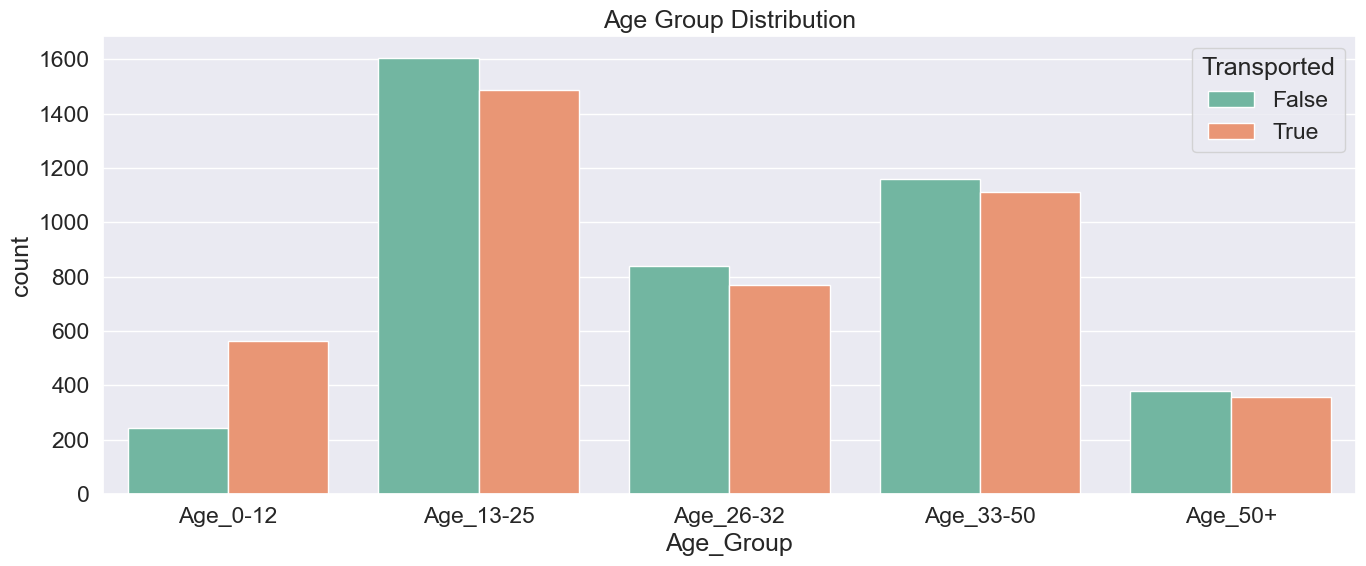

In [187]:
order = sorted(train_df["Age_Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age_Group" , hue = "Transported" , data = train_df , palette = "Set2" , order = order)
plt.title("Age Group Distribution")
plt.tight_layout()
plt.show()

### Binning The Expenditure 

In [189]:
train_df[["RoomService" , "FoodCourt" , "ShoppingMall" , "Spa" , "VRDeck"]].head()

RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0          0.0        0.0           0.0     0.0     0.0
1        109.0        9.0          25.0   549.0    44.0
2         43.0     3576.0           0.0  6715.0    49.0
3          0.0     1283.0         371.0  3329.0   193.0
4        303.0       70.0         151.0   565.0     2.0

In [190]:
exp_cols = ["RoomService" , "FoodCourt" , "ShoppingMall" , "Spa" , "VRDeck"]

def new_exp_features(df):
    df["Total_Expenditure"] = df[exp_cols].sum(axis = 1)
    df["No Spending"] = (df["Total_Expenditure"] == 0)

In [191]:
new_exp_features(train_df)
new_exp_features(test_df)

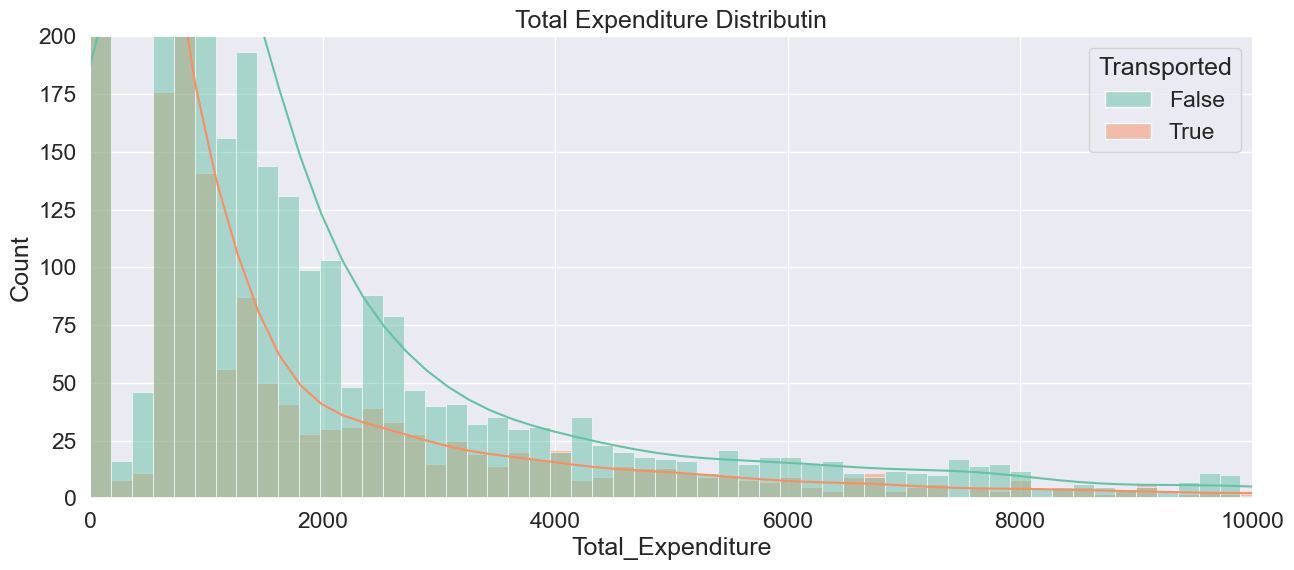

In [192]:
plt.figure(figsize = (15,6))
sns.histplot(x = "Total_Expenditure" , hue = "Transported" , data = train_df , palette = "Set2" , bins = 200 , kde = True)
plt.ylim (0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distributin")
plt.show()

In [193]:
mean = round(train_df["Total_Expenditure"].mean())
median = train_df["Total_Expenditure"].median()

print("Mean : " , mean)
print("Median : " , median)

Mean :  1441
Median :  716.0


In [194]:
def expenditure_category(df):
    expense_category = []

    for i in df["Total_Expenditure"]:
        if(i==0):
            expense_category.append("No Expense")
        elif (i < 716):
            expense_category.append("Low Expense")
        elif (i > 716 and i < 1441):
            expense_category.append("Medium Expense")
        else:
            expense_category.append("High Expense")
            
    df["Expenditure_Category"] = expense_category

In [195]:
expenditure_category(train_df)
expenditure_category(test_df)

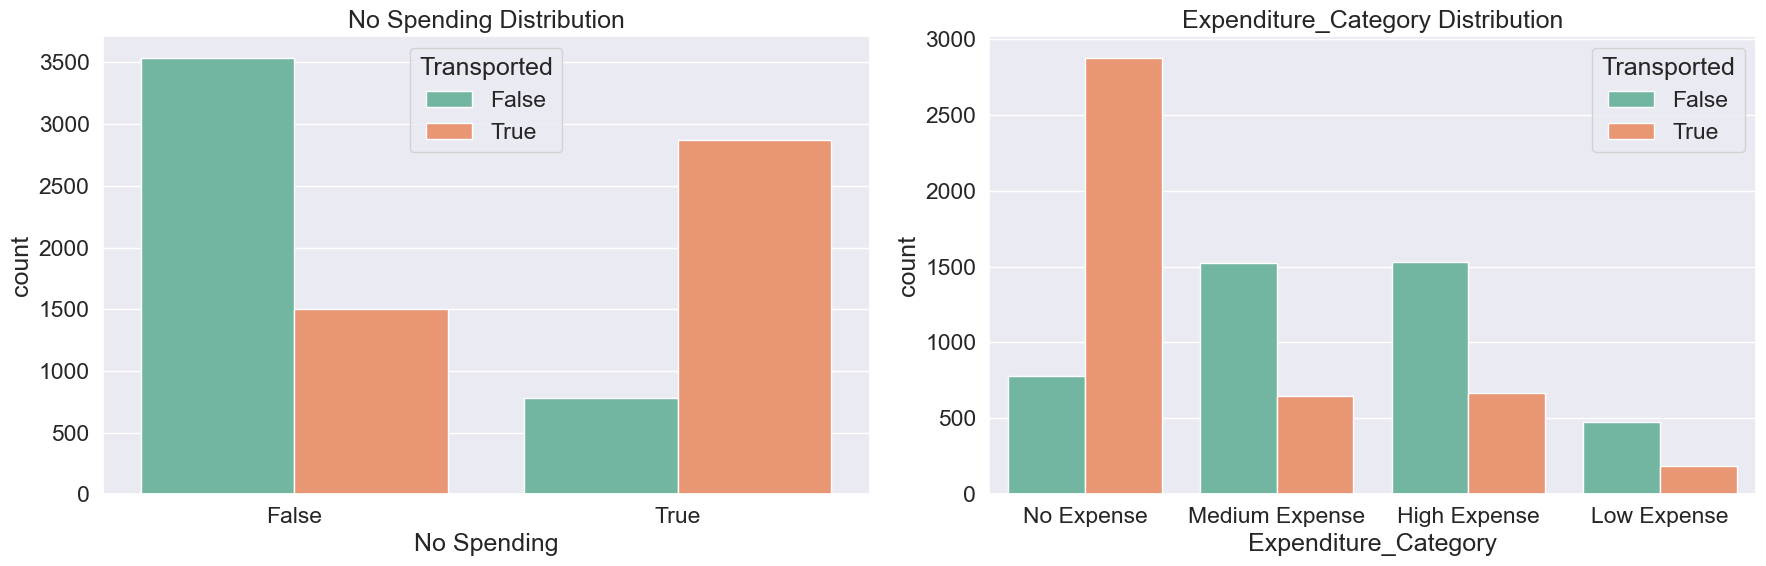

In [196]:
cols = ["No Spending" , "Expenditure_Category"]

plt.figure(figsize =(18,6))

for idx , column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x = column , hue = "Transported" , palette = "Set2" , data = train_df)
    plt.title(f"{column} Distribution")
    plt.tight_layout()

plt.show()

## Data Preprocessing 

### Handling Missing Values

In [199]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns = {0:"Number of Missing Values"})

In [200]:
z

Number of Missing Values
HomePlanet                         201
CryoSleep                          217
Destination                        182
Age                                179
VIP                                203
RoomService                        181
FoodCourt                          183
ShoppingMall                       208
Spa                                183
VRDeck                             188
Name                               200
Age_Group                          179

In [201]:
import missingno as msno

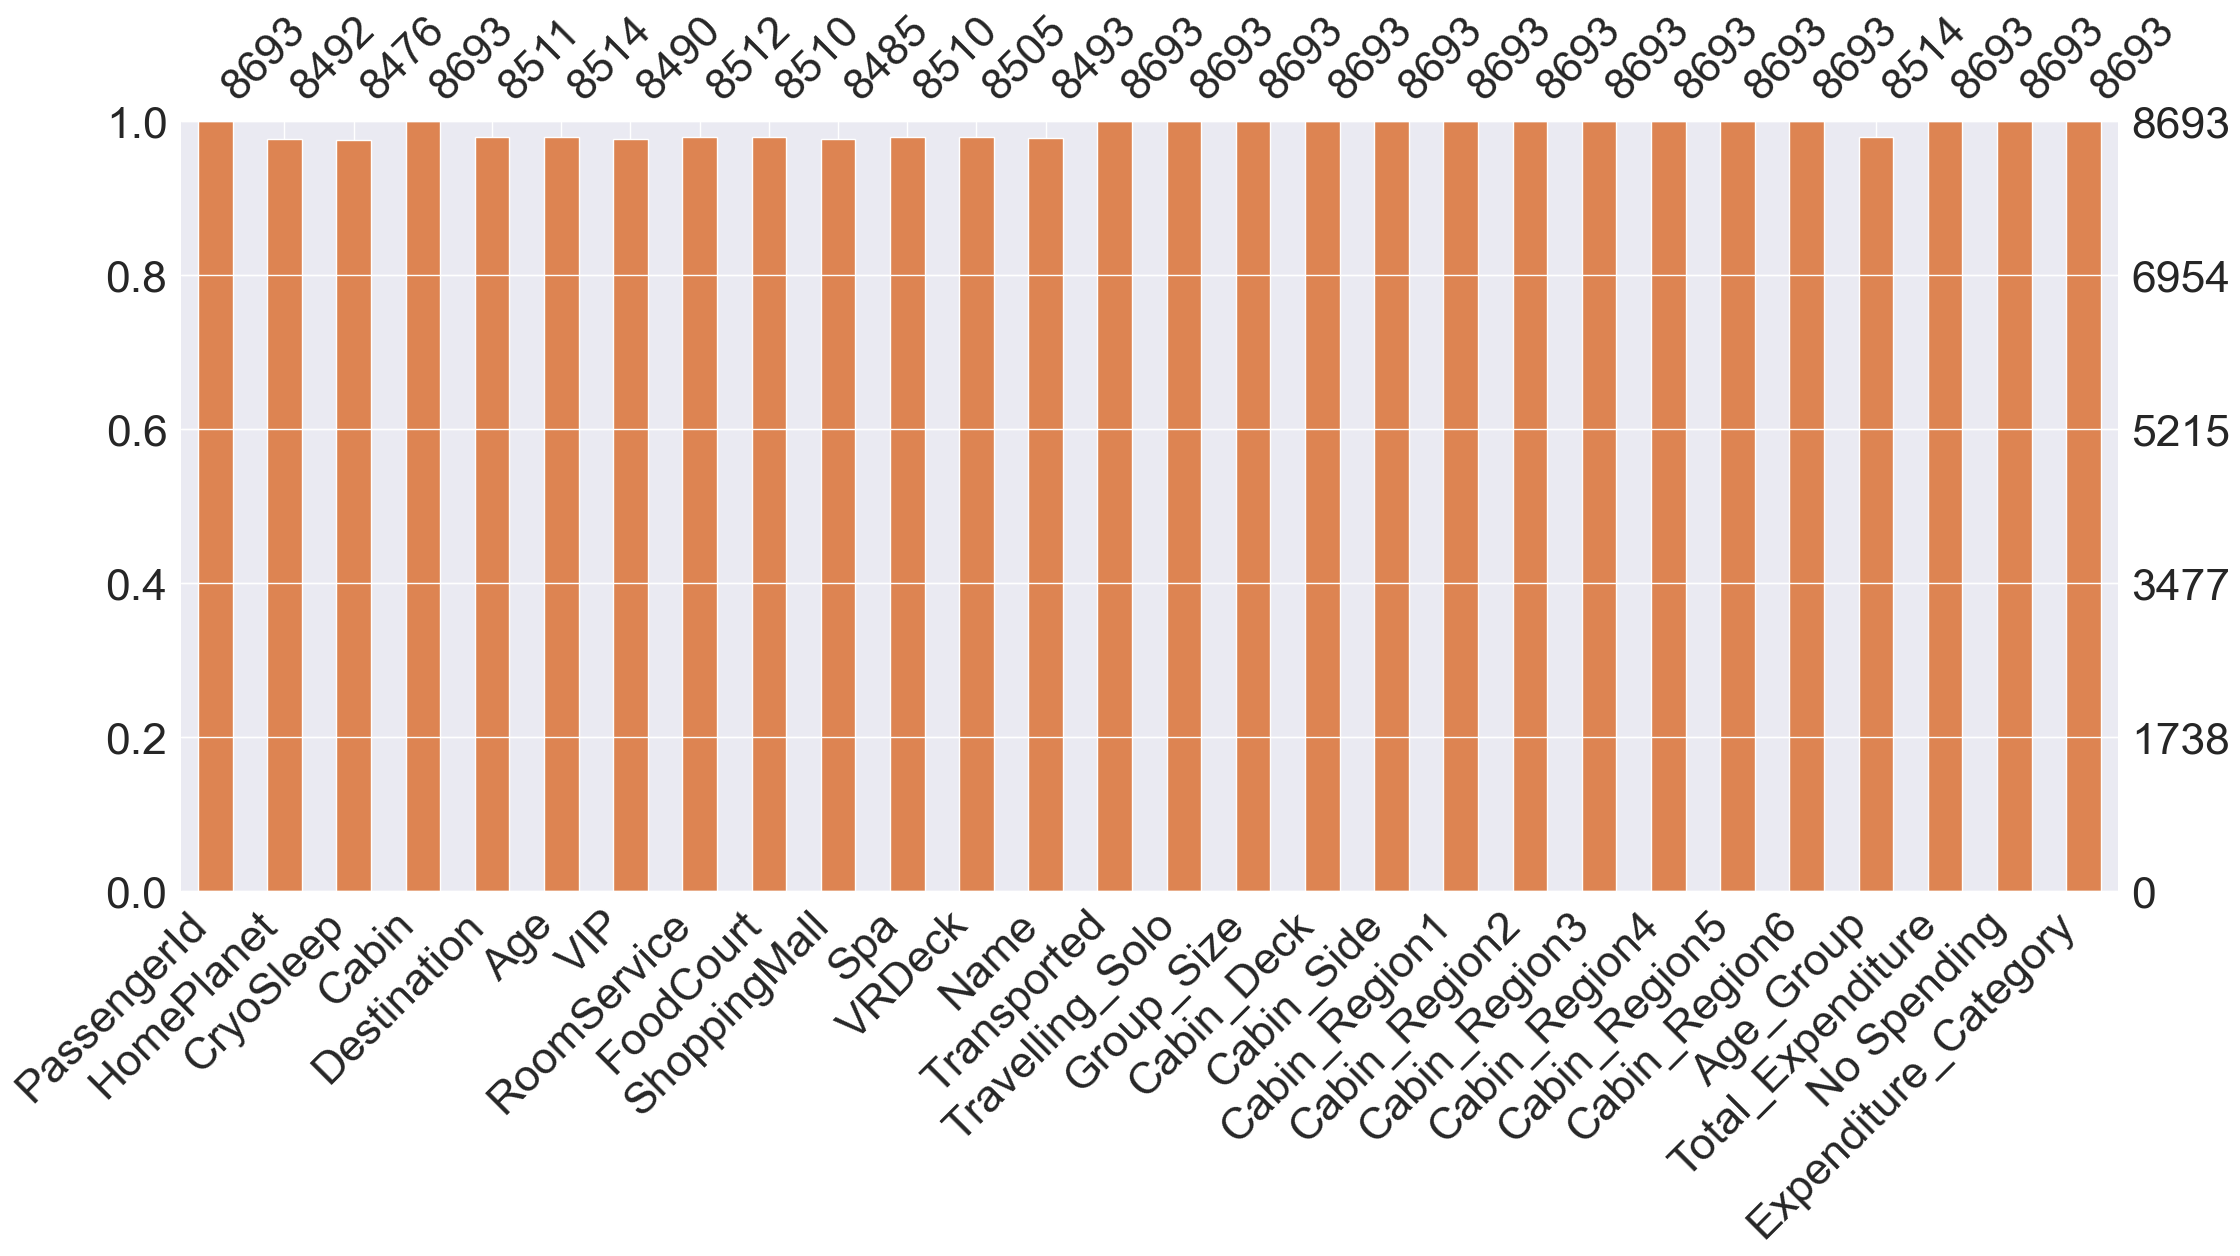

In [202]:
msno.bar(train_df , color = "C1" , fontsize = 32)
plt.show()

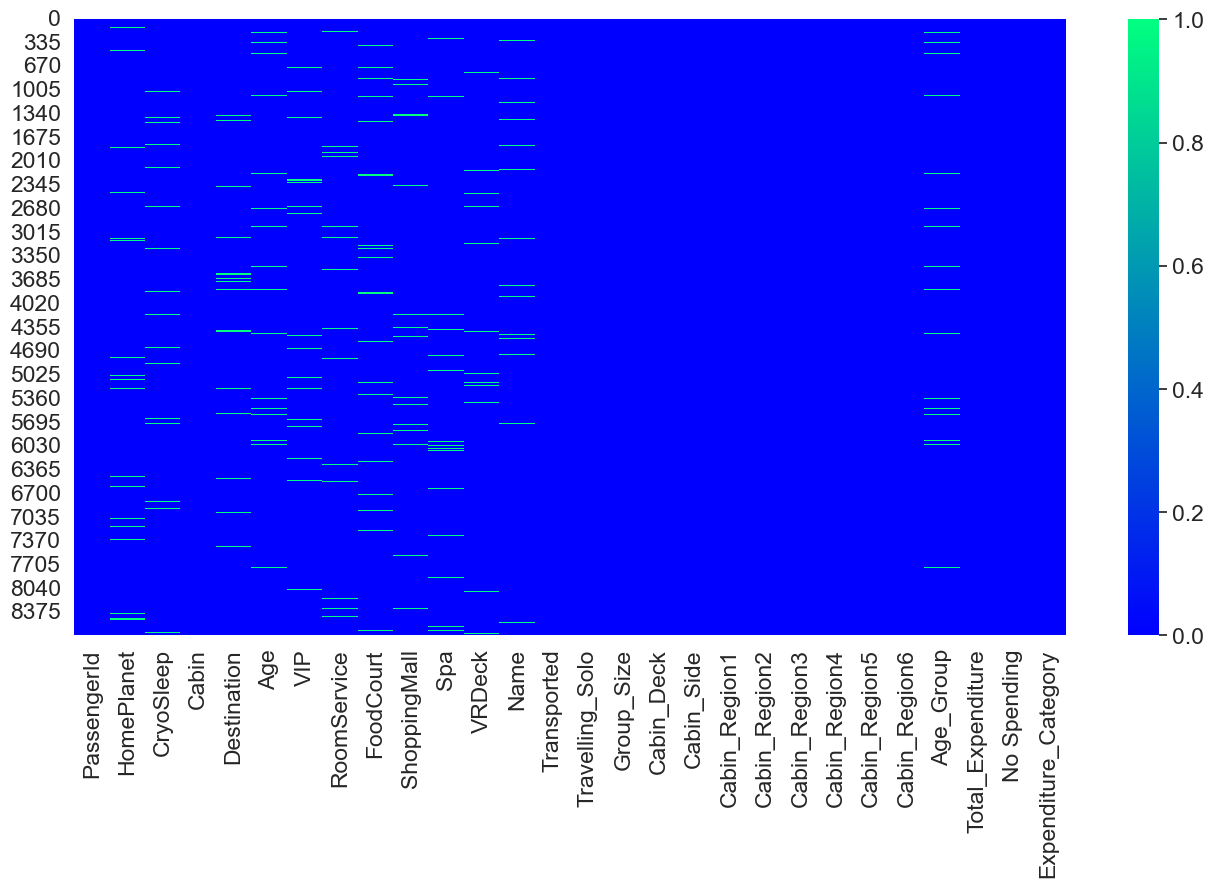

In [203]:
plt.figure(figsize = (16 , 8 ))
sns.heatmap(train_df.isnull(),cmap = "winter")
plt.show()

In [204]:
cat_cols = train_df.select_dtypes(include = ["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include = ["int","float"]).columns.tolist()

In [205]:
max_len = max(len(cat_cols), len(num_cols))

table = pd.DataFrame({
    "Categorical Columns": cat_cols + [""] * (max_len - len(cat_cols)),
    "Numerical Columns": num_cols + [""] * (max_len - len(num_cols))
})

table


Categorical Columns  Numerical Columns
0            PassengerId                Age
1             HomePlanet        RoomService
2              CryoSleep          FoodCourt
3                  Cabin       ShoppingMall
4            Destination                Spa
5                    VIP             VRDeck
6                   Name         Group_Size
7        Travelling_Solo  Total_Expenditure
8             Cabin_Deck                   
9             Cabin_Side                   
10         Cabin_Region1                   
11         Cabin_Region2                   
12         Cabin_Region3                   
13         Cabin_Region4                   
14         Cabin_Region5                   
15         Cabin_Region6                   
16             Age_Group                   
17           No Spending                   
18  Expenditure_Category

In [206]:
imputer1 = SimpleImputer(strategy = "most_frequent")
imputer2 = SimpleImputer(strategy = "median")

In [207]:
def fill_missingo(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [208]:
fill_missingo(train_df)
fill_missingo(test_df)

In [209]:
print(train_df.isnull().sum())

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                    0
Transported             0
Travelling_Solo         0
Group_Size              0
Cabin_Deck              0
Cabin_Side              0
Cabin_Region1           0
Cabin_Region2           0
Cabin_Region3           0
Cabin_Region4           0
Cabin_Region5           0
Cabin_Region6           0
Age_Group               0
Total_Expenditure       0
No Spending             0
Expenditure_Category    0
dtype: int64


In [210]:
print(test_df.isnull().sum())

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                    0
Travelling_Solo         0
Group_Size              0
Cabin_Deck              0
Cabin_Side              0
Cabin_Region1           0
Cabin_Region2           0
Cabin_Region3           0
Cabin_Region4           0
Cabin_Region5           0
Cabin_Region6           0
Age_Group               0
Total_Expenditure       0
No Spending             0
Expenditure_Category    0
dtype: int64


In [211]:
print(train_df.duplicated().sum())

0


In [212]:
print(test_df.duplicated().sum())

0


### Dropping Columns With High Cardinality

In [214]:
print(train_df.select_dtypes(include = ["object"]).nunique())

PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age_Group                  5
No Spending                2
Expenditure_Category       4
dtype: int64


In [215]:
print(test_df.select_dtypes(include = ["object"]).nunique())

PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age_Group                  5
No Spending                2
Expenditure_Category       4
dtype: int64


In [216]:
## We can drop The Columns with High Cardinality as Induce Biasness

In [217]:
pass_df = test_df["PassengerId"]

In [218]:
cols = ["PassengerId" , "Cabin" , "Name"]
train_df.drop(columns = cols , inplace = True)
test_df.drop(columns = cols , inplace = True)

In [219]:
train_df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.790291    220.009318    448.434027    169.572300    304.588865   
std      14.341404    660.519050   1595.790627    598.007164   1125.562559   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     41.000000     61.000000     22.000000     53.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck   Group_Size  Total_Expenditure  
count   8693.000000  8693.000000        8693.000000  
mean     298.261820     2.035546        1440.866329  
std     1134.126417     1.596347        2803.045694  
min        0.000000     1.000000           0.000000  
25%        0.000000     1.000000           0.000000  
50%        0.000000     1.000000         716.000000  
75%       40.000000     3.000000        1441.000000  
max    24133.000000     8.000000       35987.000000

In [220]:
train_df.head()

HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0     Europa     False  TRAPPIST-1e  39.0  False          0.0        0.0   
1      Earth     False  TRAPPIST-1e  24.0  False        109.0        9.0   
2     Europa     False  TRAPPIST-1e  58.0   True         43.0     3576.0   
3     Europa     False  TRAPPIST-1e  33.0  False          0.0     1283.0   
4      Earth     False  TRAPPIST-1e  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported Travelling_Solo  Group_Size  \
0           0.0     0.0     0.0        False            True         1.0   
1          25.0   549.0    44.0         True            True         1.0   
2           0.0  6715.0    49.0        False           False         2.0   
3         371.0  3329.0   193.0        False           False         2.0   
4         151.0   565.0     2.0         True            True         1.0   

  Cabin_Deck Cabin_Side Cabin_Region1 Cabin_Region2 Cabin_Region3  \
0          B          P          True         False         False   
1          F          S          True         False         False   
2          A          S          True         False         False   
3          A          S          True         False         False   
4          F          S          True         False         False   

  Cabin_Region4 Cabin_Region5 Cabin_Region6  Age_Group  Total_Expenditure  \
0         False         False         False  Age_33-50                0.0   
1         False         False         False  Age_13-25              736.0   
2         False         False         False    Age_50+            10383.0   
3         False         False         False  Age_33-50             5176.0   
4         False         False         False  Age_13-25             1091.0   

  No Spending Expenditure_Category  
0        True           No Expense  
1       False       Medium Expense  
2       False         High Expense  
3       False         High Expense  
4       False       Medium Expense

### Applying Log Transformation on Skewed Data as Expenditure

In [222]:
cols = ["RoomService" , "FoodCourt" , "ShoppingMall" , "Spa" , "VRDeck", "Total_Expenditure"]

for value in cols :
    train_df[value] = np.log1p(train_df[value])
    test_df[value] = np.log1p(test_df[value])

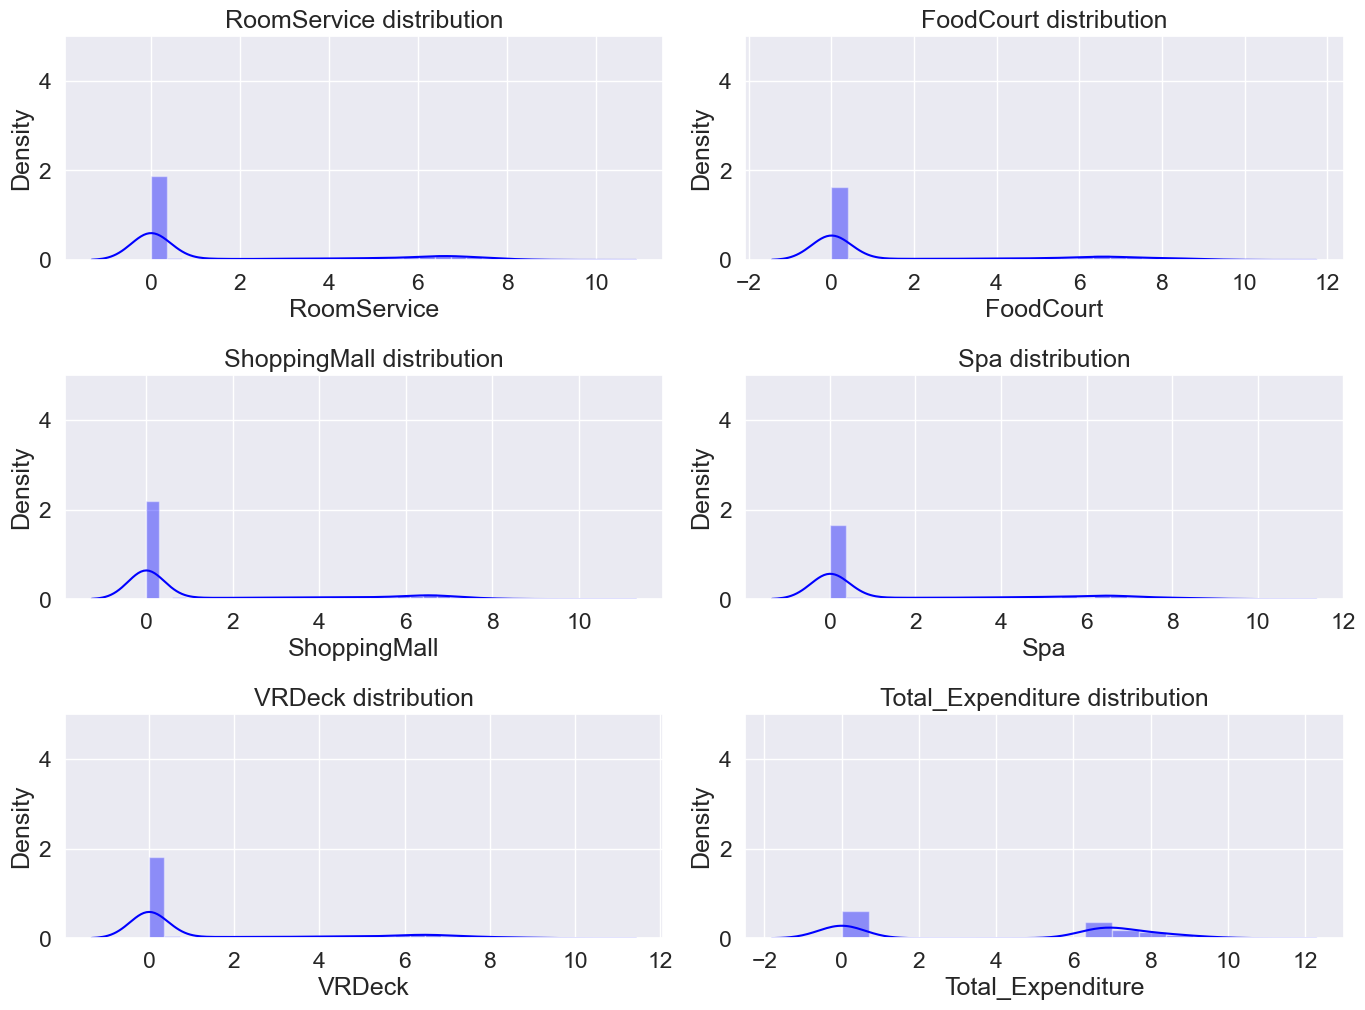

In [223]:
x = 1 

plt.figure(figsize = (14,20))

for i in cols :
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],kde = True ,color = "blue")
    plt.ylim(0,5)
    plt.title(f"{i} distribution")
    x+=1

plt.tight_layout()
plt.show()
    

In [224]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age_Group                object
Total_Expenditure       float64
No Spending              object
Expenditure_Category     object
dtype: object

### Changing Data Types to Boolean And then Encoding

In [226]:
cols = train_df.select_dtypes(include = ["bool"]).columns.drop("Transported").tolist()

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [227]:
print(list(train_df.columns))

['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Travelling_Solo', 'Group_Size', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age_Group', 'Total_Expenditure', 'No Spending', 'Expenditure_Category']


In [228]:
nominal_cat_cols =["HomePlanet","Destination"]
ordinal_cat_cols = ['CryoSleep', 'VIP' ,'Travelling_Solo' , 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3',
                    'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age_Group','No Spending', 'Expenditure_Category' ]

In [229]:
## Label Encoding
enc = LabelEncoder()

In [230]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [231]:
## One Hot Encoding
train_df = pd.get_dummies(train_df,columns = nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns = nominal_cat_cols)

In [232]:
train_df["Transported"].replace({False:0,True:1},inplace = True)

In [233]:
train_df.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0          0  39.0    0     0.000000   0.000000      0.000000  0.000000   
1          0  24.0    0     4.700480   2.302585      3.258097  6.309918   
2          0  58.0    1     3.784190   8.182280      0.000000  8.812248   
3          0  33.0    0     0.000000   7.157735      5.918894  8.110728   
4          0  16.0    0     5.717028   4.262680      5.023881  6.338594   

     VRDeck  Transported  Travelling_Solo  Group_Size  Cabin_Deck  Cabin_Side  \
0  0.000000            0                1         1.0           1           0   
1  3.806662            1                1         1.0           5           1   
2  3.912023            0                0         2.0           0           1   
3  5.267858            0                0         2.0           0           1   
4  1.098612            1                1         1.0           5           1   

   Cabin_Region1  Cabin_Region2  Cabin_Region3  Cabin_Region4  Cabin_Region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   Cabin_Region6  Age_Group  Total_Expenditure  No Spending  \
0              0          3           0.000000            1   
1              0          1           6.602588            0   
2              0          4           9.248021            0   
3              0          3           8.551981            0   
4              0          1           6.995766            0   

   Expenditure_Category  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                     3             False               True            False   
1                     2              True              False            False   
2                     0             False               True            False   
3                     0             False               True            False   
4                     2              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                    False                      False                     True  
1                    False                      False                     True  
2                    False                      False                     True  
3                    False                      False                     True  
4                    False                      False                     True

In [234]:
test_df.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall       Spa  \
0          1  27.0    0     0.000000   0.000000      0.000000  0.000000   
1          0  19.0    0     0.000000   2.302585      0.000000  7.945910   
2          1  31.0    0     0.000000   0.000000      0.000000  0.000000   
3          0  38.0    0     0.000000   8.802823      0.000000  5.204007   
4          0  20.0    0     2.397895   0.000000      6.455199  0.000000   

    VRDeck  Travelling_Solo  Group_Size  Cabin_Deck  Cabin_Side  \
0  0.00000                1         1.0           6           1   
1  0.00000                1         1.0           5           1   
2  0.00000                1         1.0           2           1   
3  6.37332                1         1.0           2           1   
4  0.00000                1         1.0           5           1   

   Cabin_Region1  Cabin_Region2  Cabin_Region3  Cabin_Region4  Cabin_Region5  \
0              1              0              0              0              0   
1              1              0              0              0              0   
2              1              0              0              0              0   
3              1              0              0              0              0   
4              1              0              0              0              0   

   Cabin_Region6  Age_Group  Total_Expenditure  No Spending  \
0              0          2           0.000000            1   
1              0          1           7.949091            0   
2              0          2           0.000000            1   
3              0          3           8.911800            0   
4              0          1           6.470800            0   

   Expenditure_Category  HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0                     3              True              False            False   
1                     0              True              False            False   
2                     3             False               True            False   
3                     0             False               True            False   
4                     1              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                    False                      False                     True  
1                    False                      False                     True  
2                     True                      False                    False  
3                    False                      False                     True  
4                    False                      False                     True

### Fitting The Test Train Data

In [236]:
X = train_df.drop(columns = ["Transported"])
y = train_df[["Transported"]]

In [237]:
scalar = StandardScaler()

In [238]:
X_scaled = scalar.fit_transform(X)
test_df_scaled = scalar.fit_transform(test_df)

In [239]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


In [240]:
print(x_train.shape , y_train.shape)

(6954, 28) (6954, 1)


In [241]:
print(y_train.shape , y_test.shape)

(6954, 1) (1739, 1)


In [242]:
x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(X_scaled , y , test_size = 0.2 , random_state = 42)


In [243]:
print(x_train1.shape , y_train1.shape)

(6954, 28) (6954, 1)


In [244]:
print(y_test1.shape , y_test.shape)

(1739, 1) (1739, 1)


## Model For Scaled Data 

### Metric Table 

In [246]:
training_score = []
testing_score = []

In [247]:
def model_prediction(model):
    model.fit(x_train1 , y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1 , x_train_pred1)*100
    b = accuracy_score(y_test1 , x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    print("Accuracy on Training Data : " , a )
    print("Accuracy on Testing data : " , b )
    print("Precison Score of Model : " , precision_score(y_test1 , x_test_pred1))
    print("Recall Score of Model : " , recall_score(y_test1 , x_test_pred1))
    print("F1 Score of Model : " , f1_score(y_test1 , x_test_pred1))

    print("Confusion Matrix of Model : ")
    cm = confusion_matrix(y_test1 , x_test_pred1)
    plt.figure(figsize = (8,4))
    sns.heatmap(cm , annot = True , fmt = "g" , cmap = "summer")
    plt.show()

### Logistic Regression

Accuracy on Training Data :  77.95513373597929
Accuracy on Testing data :  76.65324899367452
Precison Score of Model :  0.7570806100217865
Recall Score of Model :  0.7915717539863326
F1 Score of Model :  0.7739420935412027
Confusion Matrix of Model : 


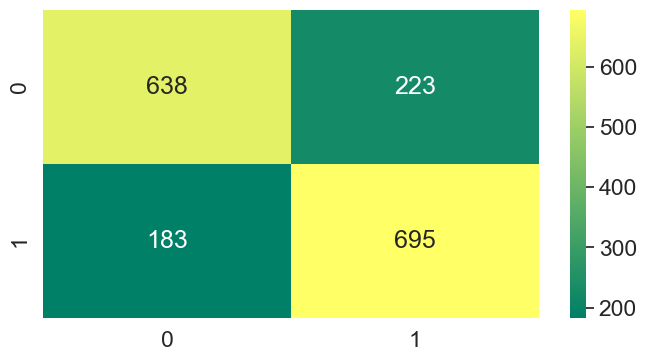

In [248]:
model_prediction(LogisticRegression())

### KNN

Accuracy on Training Data :  83.70721886683923
Accuracy on Testing data :  75.21564117308797
Precison Score of Model :  0.7689530685920578
Recall Score of Model :  0.7277904328018223
F1 Score of Model :  0.7478057343475717
Confusion Matrix of Model : 


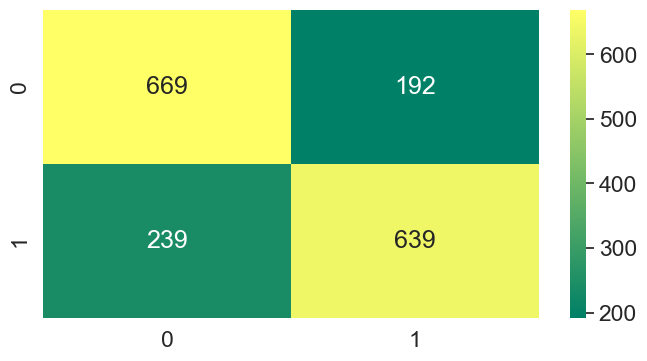

In [249]:
model_prediction(KNeighborsClassifier())

### SVC

Accuracy on Training Data :  81.98159332758125
Accuracy on Testing data :  79.58596894767108
Precison Score of Model :  0.7908787541713015
Recall Score of Model :  0.8097949886104784
F1 Score of Model :  0.8002250984805852
Confusion Matrix of Model : 


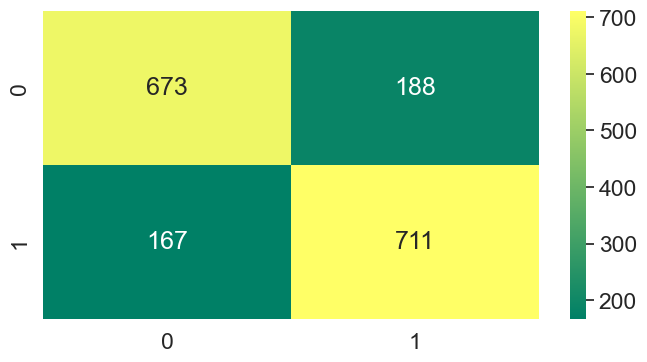

In [250]:
model_prediction(SVC())

### Naive Bayes

Accuracy on Training Data :  73.82801265458728
Accuracy on Testing data :  74.41058079355952
Precison Score of Model :  0.783748361730013
Recall Score of Model :  0.6810933940774487
F1 Score of Model :  0.728823887873248
Confusion Matrix of Model : 


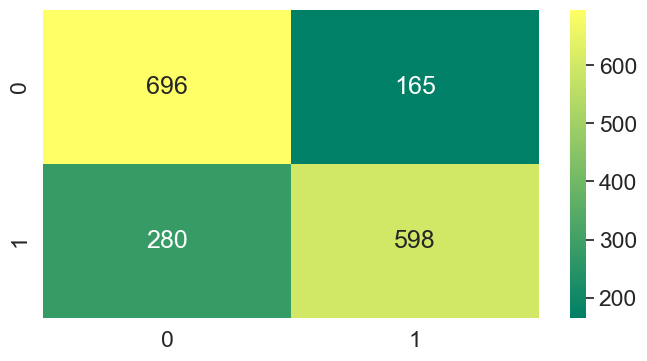

In [251]:
model_prediction(GaussianNB())

## Model For Un-Scaled Data

### Metric Table

In [253]:
def model_prediction(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train , x_train_pred)*100
    b = accuracy_score(y_test , x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    print("Accuracy of Training Model : " , a )
    print("Accuracy of Testing Model : " , b )
    print("Recall of Model : " , recall_score(y_test , x_test_pred))
    print("Prescison of Model : " , precision_score(y_test , x_test_pred))
    print("F1 of Model : " , f1_score(y_test , x_test_pred))
    print("Confusion Matrix of Model :")
    cm = confusion_matrix(y_test , x_test_pred)
    plt.figure(figsize = (8 , 4))
    sns.heatmap(xm , annot = True , fmt = "g" , cmap = "summer")
    plt.show()

### Decision Tree

Accuracy of Training Model :  98.66264020707507
Accuracy of Testing Model :  75.38815411155836
Recall of Model :  0.7619589977220956
Prescison of Model :  0.7533783783783784
F1 of Model :  0.7576443941109853
Confusion Matrix of Model :


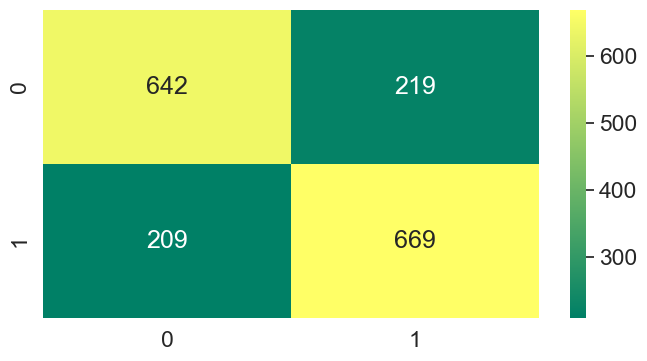

In [254]:
model_prediction(DecisionTreeClassifier())

### Random Forest

Accuracy of Training Model :  98.66264020707507
Accuracy of Testing Model :  79.35595169637722
Recall of Model :  0.7733485193621867
Prescison of Model :  0.8092967818831943
F1 of Model :  0.7909143855562026
Confusion Matrix of Model :


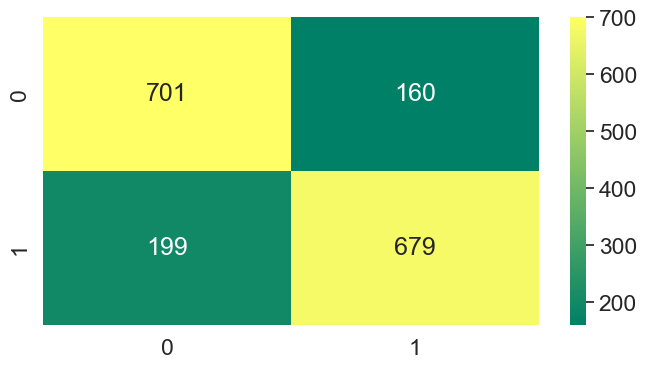

In [255]:
model_prediction(RandomForestClassifier())

### Gradient Boosting

Accuracy of Training Model :  82.2548173712971
Accuracy of Testing Model :  79.52846463484762
Recall of Model :  0.8394077448747153
Prescison of Model :  0.7741596638655462
F1 of Model :  0.805464480874317
Confusion Matrix of Model :


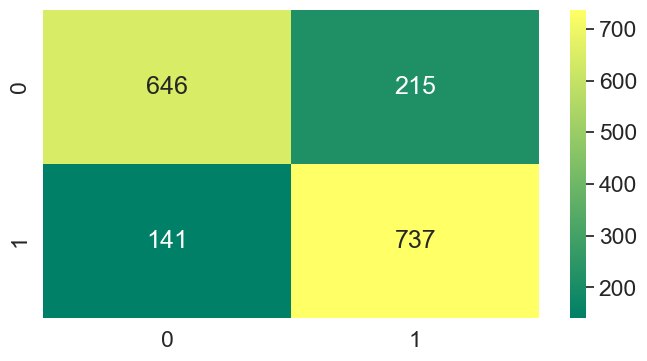

In [257]:
model_prediction(GradientBoostingClassifier())

### Ada Boosting

Accuracy of Training Model :  78.87546735691689
Accuracy of Testing Model :  77.57331799884992
Recall of Model :  0.7938496583143508
Prescison of Model :  0.7693156732891833
F1 of Model :  0.781390134529148
Confusion Matrix of Model :


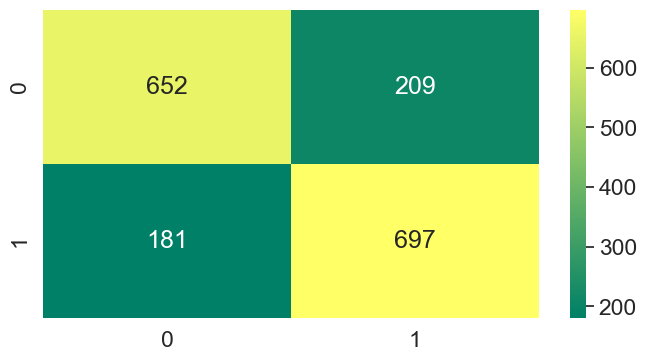

In [256]:
model_prediction(AdaBoostClassifier())

### LGBM 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
Accuracy of Training Model :  88.48144952545299
Accuracy of Testing Model :  80.62104657849338
Recall of Model :  0.8257403189066059
Prescison of Model :  0.7975797579757976
F1 of Model :  0.8114157806379407
Confusion Matrix of Model :


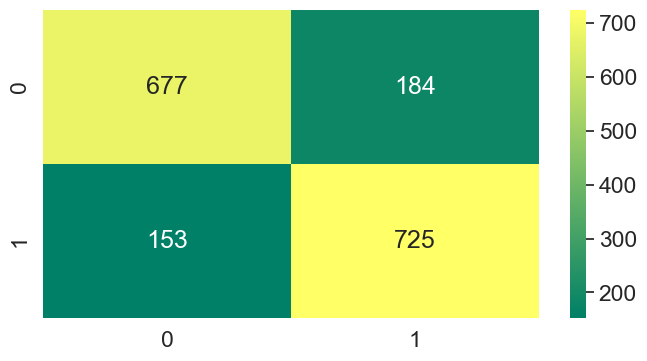

In [258]:
model_prediction(LGBMClassifier())

### Cat Boosting

Accuracy of Training Model :  87.90624101236698
Accuracy of Testing Model :  80.27602070155262
Recall of Model :  0.826879271070615
Prescison of Model :  0.7917121046892039
F1 of Model :  0.8089136490250697
Confusion Matrix of Model :


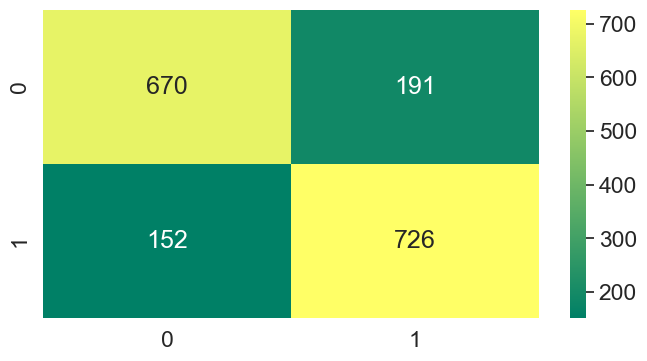

In [259]:
model_prediction(CatBoostClassifier(verbose = False))

### XG Boosting

Accuracy of Training Model :  92.65171124532642
Accuracy of Testing Model :  80.16101207590569
Recall of Model :  0.8041002277904328
Prescison of Model :  0.8031854379977247
F1 of Model :  0.8036425725668753
Confusion Matrix of Model :


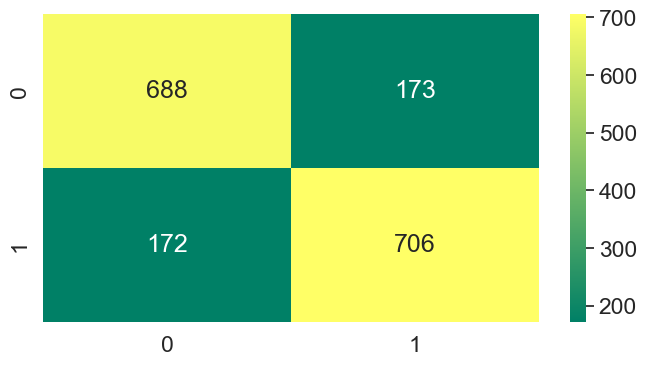

In [260]:
model_prediction(XGBClassifier())

## All Model Performance

In [262]:
len(training_score)

11

In [263]:
models = ["Logistic Regression" , "KNN" , "SVM" , "Naive Bayes" , "Decision Tree" , "Random Forest" , "Ada Boost" , "Gradient Boosting", 
         "LGBM" , "XGBoost" , "CatBoost"]

In [264]:
len(models)

11

In [265]:
df = pd.DataFrame({"Algorithms" : models,
                 "Training Score" : training_score,
                 "Testing Score " : testing_score})

In [266]:
df

Algorithms  Training Score  Testing Score 
0   Logistic Regression       77.955134       76.653249
1                   KNN       83.707219       75.215641
2                   SVM       81.981593       79.585969
3           Naive Bayes       73.828013       74.410581
4         Decision Tree       98.662640       75.388154
5         Random Forest       98.662640       79.355952
6             Ada Boost       78.875467       77.573318
7     Gradient Boosting       82.254817       79.528465
8                  LGBM       88.481450       80.621047
9               XGBoost       87.906241       80.276021
10             CatBoost       92.651711       80.161012

## Hyperparameter Tuning

### LGBM

In [268]:
model1 = LGBMClassifier()

In [269]:
parameters1 = {"n_estimates" : [100,300,500,650],
             "learning_rate" : [0.01 , 0.02 , 0.03],
             "random_state" : [0,42,48,50],
             "num_leaves" : [16,17,18]}

In [270]:
grid_search1 = GridSearchCV(model1 , parameters1 , cv = 5 , n_jobs = -1 )

In [271]:
grid_search1.fit(x_train,y_train.values.ravel())

[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503326 -> initscore=0.013302
[LightGBM] [Info] Start training from score 0.013302
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimates': [100, 300, 500, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [272]:
grid_search1.best_score_

0.8074493273820913

In [273]:
grid_search1.best_params_

{'learning_rate': 0.03,
 'n_estimates': 100,
 'num_leaves': 17,
 'random_state': 0}

In [274]:
best_params1 = grid_search1.best_params_

In [275]:
model1 = LGBMClassifier(**best_params1)

In [276]:
model1.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


LGBMClassifier(learning_rate=0.03, n_estimates=100, num_leaves=17,
               random_state=0)

In [277]:
x_test_pred1 = model1.predict(x_test)

[LightGBM] [Warning] Unknown parameter: n_estimates


In [278]:
accuracy_score(y_test , x_test_pred1)

0.7981598619896493

### Cat Boost

In [280]:
model2 = CatBoostClassifier()

In [281]:
parameters2 = {"learning_rate" : [0.1,0.3,0.5,0.6,0.7],
              "random_state" : [0,42,48,50],
              "depth" : [8,9,10],
              "iterations" : [35,40,50]}

In [282]:
grid_search2 = GridSearchCV(model2 , parameters2 , cv = 5 , n_jobs = -1)

In [283]:
grid_search2.fit(x_train , y_train )

[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of positive: 2800, number of negative: 2763
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1667
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503326 -> initscore=0.013302
[LightGBM] [Info] Start training from score 0.013302
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x3131ed3d0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [284]:
grid_search2.best_score_

0.8110445877661638

In [285]:
best_params2 = grid_search2.best_params_

In [286]:
best_params2

{'depth': 8, 'iterations': 40, 'learning_rate': 0.3, 'random_state': 48}

In [287]:
model2 = CatBoostClassifier(**best_params2)

In [288]:
model2.fit(x_train , y_train)

0:	learn: 0.5683250	total: 4.32ms	remaining: 168ms
1:	learn: 0.5011350	total: 8.17ms	remaining: 155ms
2:	learn: 0.4710107	total: 12ms	remaining: 147ms
3:	learn: 0.4523933	total: 15.6ms	remaining: 140ms
4:	learn: 0.4372541	total: 19.5ms	remaining: 136ms
5:	learn: 0.4253322	total: 23.2ms	remaining: 132ms
6:	learn: 0.4069156	total: 26.9ms	remaining: 127ms
7:	learn: 0.4013911	total: 30.6ms	remaining: 122ms
8:	learn: 0.3950715	total: 34.2ms	remaining: 118ms
9:	learn: 0.3855041	total: 37.8ms	remaining: 114ms
10:	learn: 0.3803939	total: 41.4ms	remaining: 109ms
11:	learn: 0.3771195	total: 45ms	remaining: 105ms
12:	learn: 0.3750364	total: 48.6ms	remaining: 101ms
13:	learn: 0.3707847	total: 52.4ms	remaining: 97.3ms
14:	learn: 0.3636426	total: 56.3ms	remaining: 93.8ms
15:	learn: 0.3601057	total: 60.4ms	remaining: 90.5ms
16:	learn: 0.3555775	total: 64.2ms	remaining: 86.9ms
17:	learn: 0.3531935	total: 68ms	remaining: 83.1ms
18:	learn: 0.3492539	total: 71.7ms	remaining: 79.3ms
19:	learn: 0.3464946	t

In [289]:
x_test_pred2 = model2.predict(x_test)

In [290]:
accuracy_score(y_test , x_test_pred2)

0.7993099482461185

### XG Boost

In [292]:
model3 = XGBClassifier()

In [293]:
parameters3 = {"n_estimates" : [50,100,150],
              "random_state" : [42,0,50],
              "learning_rate" : [0.1,0.3,0.5,1.0]}

In [294]:
grid_search3 = GridSearchCV(model3 , parameters3 , n_jobs = -1 , cv = 5)

In [295]:
grid_search3.fit(x_train , y_train )

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimates': [50, 100, 150],
                         'random_state': [42, 0, 50]})

In [296]:
grid_search3.best_score_

0.8120498166527884

In [297]:
best_params3 = grid_search3.best_params_

In [298]:
best_params3

{'learning_rate': 0.1, 'n_estimates': 50, 'random_state': 42}

In [299]:
model3 = XGBClassifier(**best_params3)

In [300]:
model3.fit(x_train , y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimates=50,
              n_estimators=None, n_jobs=None, ...)

In [301]:
x_test_pred3 = model3.predict(x_test)

In [302]:
accuracy_score(y_test , x_test_pred3)

0.8062104657849338

### Random Forest 

In [304]:
model4 = RandomForestClassifier()

In [305]:
parameters4 = {"n_estimators" : [100,300,500,700],
              "min_samples_split" : [7,8,9],
              "max_depth" : [10,11,12] ,
              "min_samples_leaf" : [4,5,6]}

In [306]:
grid_search4 = GridSearchCV(model4 , parameters4 , cv = 5 , n_jobs = -1 )

In [307]:
grid_search4.fit(x_train , y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 700]})

In [308]:
grid_search4.best_score_

0.8070178795856198

## Stacking Classifier Model 

In [310]:
stacking_model = StackingClassifier(estimators = [('LGBM' , model1),
                                                 ('Cat Boost' , model2),
                                                 ('XGBoost' , model3),
                                                 ('RF' , model4)])

In [311]:
stacking_model.fit(x_train , y_train )

[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimates
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230
0:	learn: 0.5683250	total: 15.6ms	remaining: 610ms
1:	learn: 0.5011350	total: 19.8ms	remaining: 376ms
2:	learn: 0.4710107	total: 23.9ms	remaining: 294ms
3:	learn: 0.4523933	total: 28.7ms	remaining: 258ms
4:	learn: 0.4372541	total: 32.5ms	remaining: 228ms
5:	learn

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.03,
                                               n_estimates=100, num_leaves=17,
                                               random_state=0)),
                               ('Cat Boost',
                                <catboost.core.CatBoostClassifier object at 0x31327e690>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimates=50, n_estimators=None,
                                              n_jobs=None, ...)),
                               ('RF', RandomForestClassifier())])

In [312]:
x_train_pred = stacking_model.predict(x_train)

[LightGBM] [Warning] Unknown parameter: n_estimates


In [313]:
x_test_pred = stacking_model.predict(x_test)

[LightGBM] [Warning] Unknown parameter: n_estimates


In [314]:
accuracy_score(y_train , x_train_pred)

0.8723037100949094

In [315]:
accuracy_score(y_test , x_test_pred)

0.8039102932719954

## Predicting Test Data

In [558]:
pred = stacking_model.predict(test_df)

[LightGBM] [Warning] Unknown parameter: n_estimates


In [560]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [562]:
len(pred)

4277

In [574]:
pass_df = pass_df.to_frame(name="PassengerId")

In [576]:
pass_df = pass_df.iloc[:len(pred)].copy()


In [578]:
pass_df["Transported"] = pred.astype(bool)


In [580]:
len(pred), len(pass_df)


(4277, 4277)

In [582]:
pass_df.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False

In [584]:
pass_df.shape

(4277, 2)

In [586]:
pass_df.to_csv("spaceship_prediction_project.csv" , index = False)